In [1]:
import pandas as pd
import statsmodels.api as sm 
import numpy as np

In [2]:
#Load the data
df = pd.read_csv("profitable_orders.csv")
df.head()

,order_number,gender,age_group,new_customer,fast_delivery,loyalty_program,discount_rate,average_item_value,items_per_order,profit
0,5.721630e+12,Female,not specified,0,0,0,0.58,25,10,-78
1,4.965100e+12,Female,not specified,0,0,0,0.32,41,1,2
2,7.182790e+12,Male,not specified,0,0,0,0.39,54,2,17
3,5.708210e+12,Female,not specified,0,0,0,0.45,16,2,-8
4,8.485200e+12,Female,not specified,0,0,0,0.31,14,5,-5


In [5]:

#print Df information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208871 entries, 0 to 208870
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   order_number        208871 non-null  float64
 1   gender              208871 non-null  object 
 2   age_group           208871 non-null  object 
 3   new_customer        208871 non-null  int64  
 4   fast_delivery       208871 non-null  int64  
 5   loyalty_program     208871 non-null  int64  
 6   discount_rate       208871 non-null  float64
 7   average_item_value  208871 non-null  int64  
 8   items_per_order     208871 non-null  int64  
 9   profit              208871 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 15.9+ MB


In [6]:
#Create the binary variable, profit_binary, that is 1, if the profit is above 0. One way of creating it is to use the where() function from numpy.

#Prepare dependent variable
df['profit_binary'] = np.where(df["profit"] > 0, 1, 0)
df.head()

,order_number,gender,age_group,new_customer,fast_delivery,loyalty_program,discount_rate,average_item_value,items_per_order,profit,profit_binary
0,5.721630e+12,Female,not specified,0,0,0,0.58,25,10,-78,0
1,4.965100e+12,Female,not specified,0,0,0,0.32,41,1,2,1
2,7.182790e+12,Male,not specified,0,0,0,0.39,54,2,17,1
3,5.708210e+12,Female,not specified,0,0,0,0.45,16,2,-8,0
4,8.485200e+12,Female,not specified,0,0,0,0.31,14,5,-5,0


In [7]:
#Use the describe() function to look at the summary statistics.

#Summary statistics
df.describe()

,order_number,new_customer,fast_delivery,loyalty_program,discount_rate,average_item_value,items_per_order,profit,profit_binary
count,2.088710e+05,208871.000000,208871.000000,208871.000000,208871.000000,208871.000000,208871.000000,208871.000000,208871.000000
mean,5.002208e+12,0.056341,0.008982,0.223707,0.275642,54.714690,1.745503,7.230530,0.656592
std,2.889083e+12,0.230580,0.094345,0.416729,0.193262,46.980543,1.462564,14.895498,0.474847
min,4.547205e+07,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-174.000000,0.000000
25%,2.496965e+12,0.000000,0.000000,0.000000,0.100000,24.000000,1.000000,-1.000000,0.000000
50%,4.998800e+12,0.000000,0.000000,0.000000,0.300000,40.000000,1.000000,4.000000,1.000000
75%,7.507100e+12,0.000000,0.000000,0.000000,0.450000,70.000000,2.000000,11.000000,1.000000
max,9.999990e+12,1.000000,1.000000,1.000000,0.860000,1190.000000,98.000000,442.000000,1.000000


In [ ]:
#Average_item_value and items_per_order have clear outliers that need to be removed to
improve the analysis. The profit_binary variable average is 0.66, 
which means that 66% of the values are 1. As a result, the data set is imbalanced.

array([[<AxesSubplot:title={'center':'discount_rate'}>,
        <AxesSubplot:title={'center':'average_item_value'}>],
       [<AxesSubplot:title={'center':'items_per_order'}>, <AxesSubplot:>]],
      dtype=object)

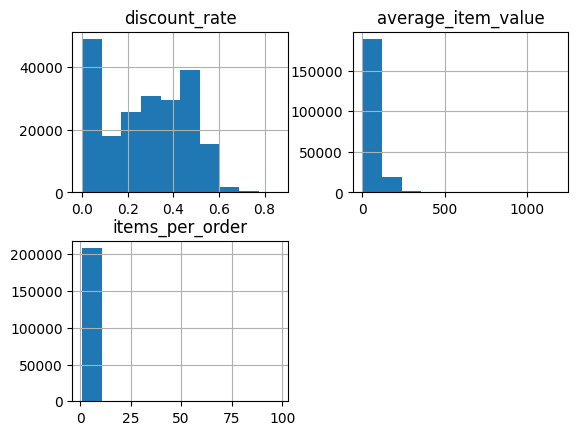

In [8]:
#Create histograms by using the hist() function from Pandas after selecting the 3 variables.

#plot histograms
df.loc[:,["discount_rate", "average_item_value", "items_per_order"]].hist()

array([[<AxesSubplot:title={'center':'discount_rate'}>,
        <AxesSubplot:title={'center':'average_item_value'}>],
       [<AxesSubplot:title={'center':'items_per_order'}>, <AxesSubplot:>]],
      dtype=object)

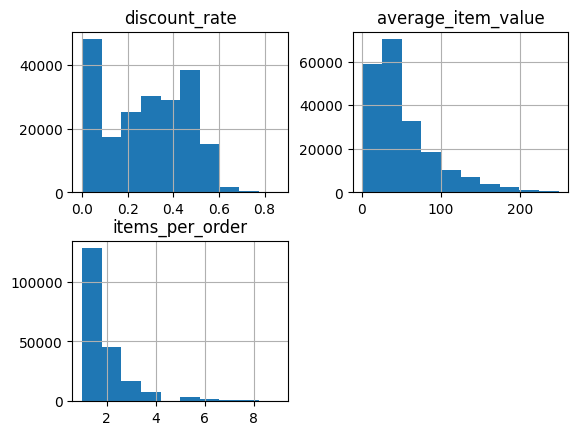

In [9]:
#Remove outliers by excluding extreme errors from the average_item_value and items_per_order. One possible solution is the following:

#Removing outliers
df = df[df["items_per_order"] < 10]
df = df[df["average_item_value"] < 250]
 
#plotting again to see the differences in the histograms
df.loc[:,["discount_rate", "average_item_value", "items_per_order"]].hist()

In [10]:
#Use the value_counts() function to count how many values there are per unique age_group

#Check age group possibilities
df.age_group.value_counts()

not specified    148090
30 - 39 years     19134
20 - 29 years     16515
40 - 49 years     13424
50 - 59 years      6358
60 years           1648
< 20 years         1348
Name: age_group, dtype: int64

In [11]:
#Check gender possibilities
df.gender.value_counts()

Female    120312
Male       56129
           30076
Name: gender, dtype: int64

In [12]:
#Apply the get_dummies() function from Pandas to create the binary variables.

#Transform objects into dummy variables
df = pd.get_dummies(df, drop_first = True)
df.head()

,order_number,new_customer,fast_delivery,loyalty_program,discount_rate,average_item_value,items_per_order,profit,profit_binary,gender_Female,gender_Male,age_group_30 - 39 years,age_group_40 - 49 years,age_group_50 - 59 years,age_group_60 years,age_group_< 20 years,age_group_not specified
1,4.965100e+12,0,0,0,0.32,41,1,2,1,1,0,0,0,0,0,0,1
2,7.182790e+12,0,0,0,0.39,54,2,17,1,0,1,0,0,0,0,0,1
3,5.708210e+12,0,0,0,0.45,16,2,-8,0,1,0,0,0,0,0,0,1
4,8.485200e+12,0,0,0,0.31,14,5,-5,0,1,0,0,0,0,0,0,1
5,1.703790e+12,0,0,1,0.11,76,1,20,1,1,0,1,0,0,0,0,0


In [14]:
#Isolate the Dependent (y) and Independent (X) variables.

# Isolate X and y
y = df.profit_binary
X = df.drop(columns = ["order_number", "profit", "profit_binary"])

In [15]:
#Add a constant to X with the add_constant() function.

#Add constant to X
X = sm.add_constant(X)
X.head(2)

,const,new_customer,fast_delivery,loyalty_program,discount_rate,average_item_value,items_per_order,gender_Female,gender_Male,age_group_30 - 39 years,age_group_40 - 49 years,age_group_50 - 59 years,age_group_60 years,age_group_< 20 years,age_group_not specified
1,1.0,0,0,0,0.32,41,1,1,0,0,0,0,0,0,1
2,1.0,0,0,0,0.39,54,2,0,1,0,0,0,0,0,1


In [17]:
#Apply the train_test_split function, setting the test_size to 0.2 and random_state to 1502.

#Training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 1502)

In [18]:
#Use the Logit functions entering the X_train and y_train while inputting the fit method.

# Build the Logistic Regression model
model = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.511278
         Iterations 7


In [19]:
#Print the model summary. Make sure to use the print() function in combination.

#Print the Logistic Regression model summary
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:          profit_binary   No. Observations:               165213
Model:                          Logit   Df Residuals:                   165198
Method:                           MLE   Df Model:                           14
Date:                Sun, 06 Aug 2023   Pseudo R-squ.:                  0.2063
Time:                        13:16:30   Log-Likelihood:                -84470.
converged:                       True   LL-Null:                   -1.0643e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.0149      0.032     32.191      0.000       0.953       1.077
new_customer                0.2301      0.029      7.942      0.000       0.173       0.287


In [ ]:
#The gender_female is not statistically significant. Nor the items_per_order,
although it would be significant at the 10% level. The loyalty_program, discount_rate, 
age group below 20 and age not specified contribute
negatively to making an order profitable. Everything else contributes positively.

In [21]:
#Create the function with three possibilities: coefficient = 0, bigger than 0 and lower than 0. The formula for computing the probability increase is (exp(coefficient) -1) * 100 %.

#Create the function
def logistic_reader(coefficient):
  probability = round((np.exp(coefficient) - 1) * 100, 2)
  if probability > 0:
    print(f"The likelihood increases by {probability} %")
  elif probability == 0:
    print("No impact")
  else:
    print(f"The likelihood decreases by {probability} %")

In [22]:
#Apply the function to the new_customer variable.

#Apply the function for new customers
logistic_reader(0.23)

The likelihood increases by 25.86 %


In [ ]:
If the order comes from a new customer,
the probability that the order is profitable increases by 25.86%.



In [23]:
#Repeat the process for the average_item_value variable.

#Apply the function for average_item value
logistic_reader(0.02)

The likelihood increases by 2.02 %


In [ ]:
#For each unit increase in the average_item_value,
the probability that the order is profitable improves by 2.02%.

In [24]:
#Use the model with the predict function to make the predictions.

# Apply the model to make the predictions
predictions = model.predict(X_test)
predictions[:5]

15823     0.784328
199591    0.386870
40015     0.858050
156089    0.928858
42914     0.350873
dtype: float64

In [25]:
#Transform the predictions into 1s or 0s using the where function from numpy.

#Transform the predictions into 1 and 0
predictions = np.where(predictions > 0.5, 1, 0)
predictions[:5]

array([1, 0, 1, 1, 0])

In [26]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

[[ 8292  5903]
 [ 3574 23535]]


In [27]:
#Accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Accuracy:", round(accuracy * 100, 1), "%")
 
#F1_score
f1 = 2 * tp / (2 * tp + fn + fp)
print("F1_score:", round(f1 * 100, 1), "%")
 
#Specificity
specificity = tn / (tn + fp)
print("Specificity:", round(specificity * 100, 1), "%")
 
#Sensitivity
sensitivity = tp / (tp + fn)
print("Sensitivity:", round(sensitivity * 100, 1), "%")

Accuracy: 77.1 %
F1_score: 83.2 %
Specificity: 58.4 %
Sensitivity: 86.8 %
